<a href="https://colab.research.google.com/github/willyan041107/DS1002/blob/main/Yan_DS1002_Due_Feb_19_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO


In [2]:
# Define Filter Functions

def red_filter(image):
    red_filtered = image.copy()
    red_filtered[:, :, 1] = 0  # Set green values to 0
    red_filtered[:, :, 2] = 0  # Set blue values to 0
    return red_filtered

def green_filter(image):
    green_filtered = image.copy()
    green_filtered[:, :, 0] = 0  # Set red values to 0
    green_filtered[:, :, 2] = 0  # Set blue values to 0
    return green_filtered

def blue_filter(image):
    blue_filtered = image.copy()
    blue_filtered[:, :, 0] = 0  # Set red values to 0
    blue_filtered[:, :, 1] = 0  # Set green values to 0
    return blue_filtered

def red_green_filter(image):
    filtered = image.copy()
    filtered[:, :, 2] = 0  # Set blue values to 0
    return filtered

def red_blue_filter(image):
    filtered = image.copy()
    filtered[:, :, 1] = 0  # Set green values to 0
    return filtered

def green_blue_filter(image):
    filtered = image.copy()
    filtered[:, :, 0] = 0  # Set red values to 0
    return filtered

In [3]:
# Script to Process and Display Images

def process_and_display_image(url):
    # Download the image from the URL
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img_np = np.array(img)

    # Apply Filters
    red_img = red_filter(img_np)
    green_img = green_filter(img_np)
    blue_img = blue_filter(img_np)
    red_green_img = red_green_filter(img_np)
    red_blue_img = red_blue_filter(img_np)
    green_blue_img = green_blue_filter(img_np)

    # Combine Filtered Images
    combined_img = red_img + green_img + blue_img

    # Display Original and Filtered Images
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    titles = ['Original', 'Red Filter', 'Green Filter', 'Blue Filter',
              'Red-Green', 'Red-Blue', 'Green-Blue', 'Combined']
    images = [img_np, red_img, green_img, blue_img,
              red_green_img, red_blue_img, green_blue_img, combined_img]

    for ax, img, title in zip(axes.flatten(), images, titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    # Check for Image Equality
    if np.array_equal(img_np, combined_img):
        print("The original image is identical to the combined image.")
    else:
        print("The original image and the combined image are not identical.")

Please enter the URL of a .jpg file: https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2


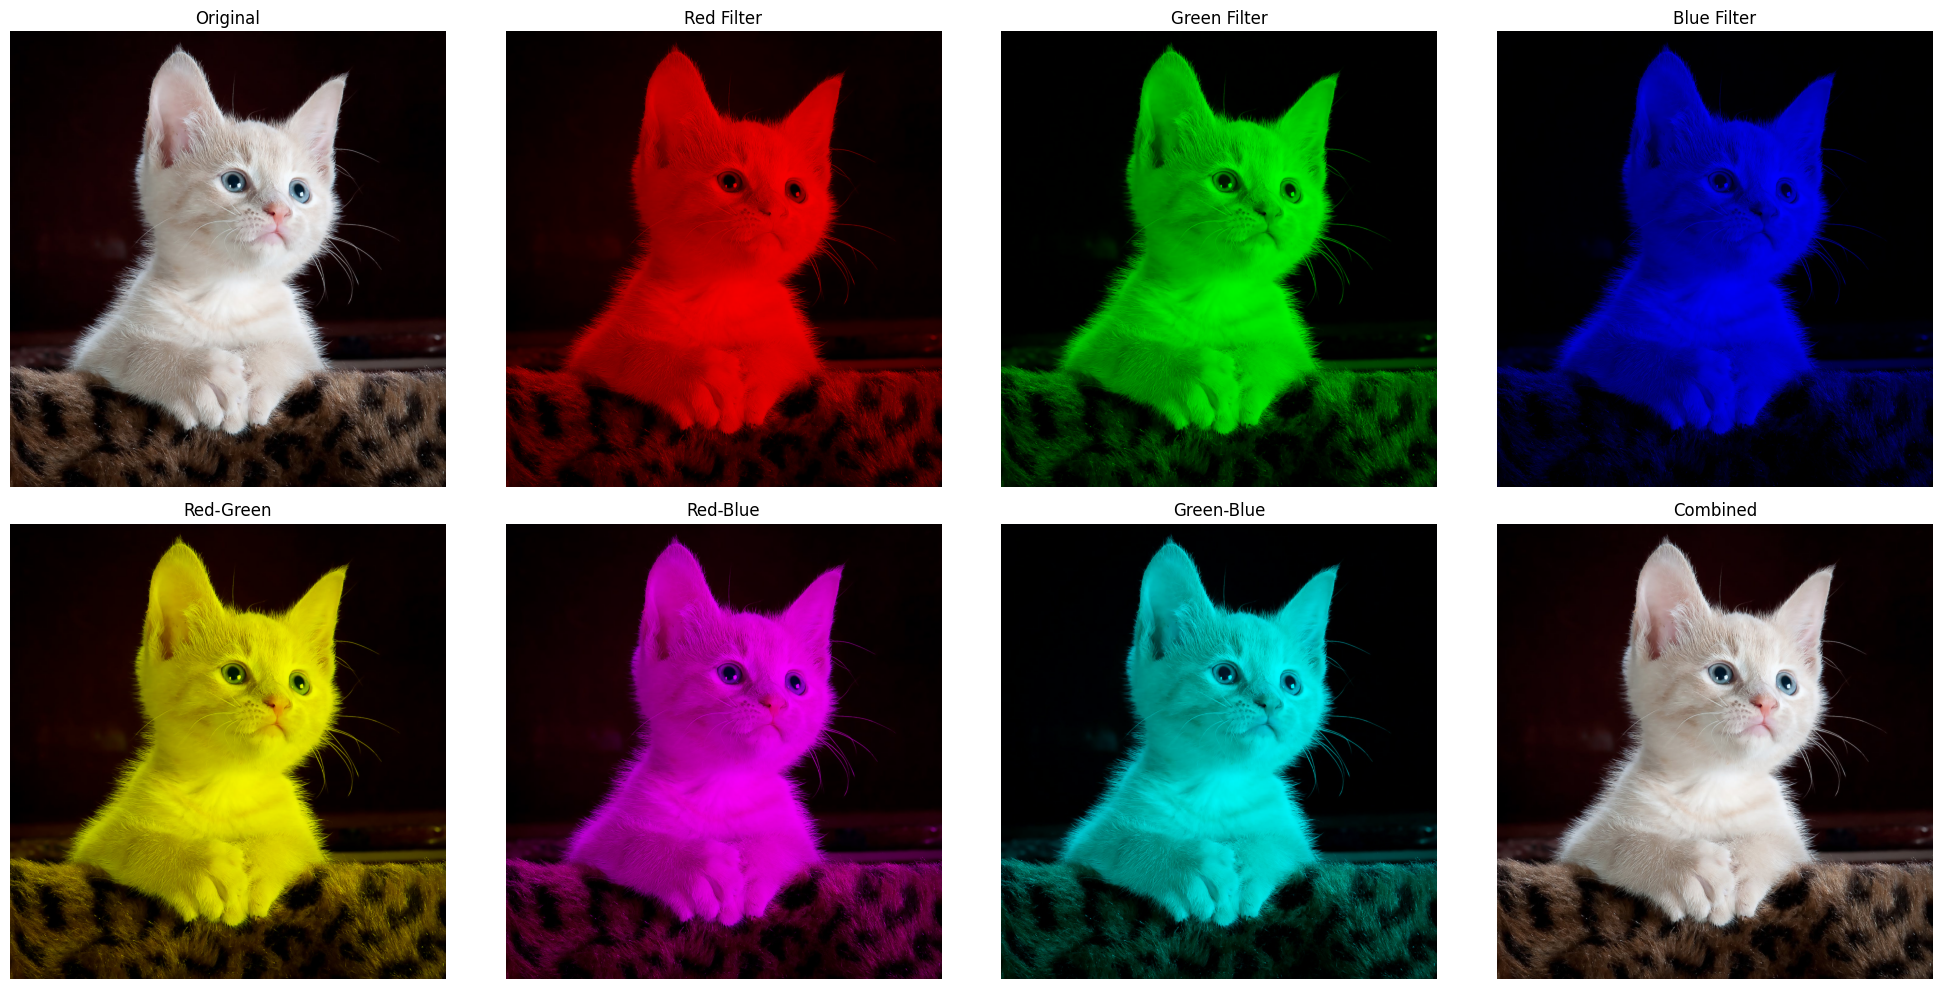

The original image is identical to the combined image.


In [5]:
# Prompt for Image URL and Process the Image

url = input("Please enter the URL of a .jpg file: ")
process_and_display_image(url)